In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("responses.csv")

In [5]:
data.shape

(330, 15)

In [6]:
data.head()

,Unnamed: 0,Age,Gender,Marital status,Are you currently employed?,How often do you shop online ?,Choose 2 products you prefer to buy online,Which mobile phone brand would you prefer to buy online?,Which headphone brand would you prefer to buy online?,Which brand laptop would you prefer to buy online?,Which of the home appliances you would like to buy online ?,How much do you spend on online shopping every month?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?
0,NaN,20,Male,Unmarried,No,Frequently,"Laptop, Headphones",others,Samsung,HP,"Television, Air conditioner, Refrigerator, Mic...",20000,Getting third quality product or a duplicate p...,Amazon,Customer service
1,NaN,21,Male,Unmarried,No,Frequently,"Mobile phones, Headphones",Redmi,JBL,Acer,Television,5000,Breach of payment details,Flipkart,Great discounts
2,NaN,20,Male,Unmarried,No,Frequently,"Mobile phones, Laptop, Headphones, Home applia...",Apple,Noise,Asus,"Television, Air conditioner, Refrigerator, Mic...",2000,Getting third quality product or a duplicate p...,Amazon,Great discounts
3,NaN,21,Male,Unmarried,No,Frequently,"Mobile phones, Headphones",Samsung,Boat,Acer,Microwave oven,10000,Getting third quality product or a duplicate p...,Amazon,Easy shopping
4,NaN,23,Female,Unmarried,No,Frequently,"Headphones, Home appliances",Oneplus,JBL,HP,Microwave oven,10000,Breach of personal information,Amazon,Easy shopping


In [7]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Marital status',
       'Are you currently employed?', 'How often do you shop online ?',
       'Choose 2 products you prefer to buy online ',
       'Which mobile phone brand would you prefer to buy online?',
       'Which headphone brand would you prefer to buy online?',
       'Which brand laptop would you prefer to buy online?',
       'Which of the home appliances you would like to buy online ?',
       'How much do you spend on online shopping every month?',
       'What is your biggest concern about online shopping?',
       'Which online store you prefer the most among the following ?',
       'What do you like about online shopping ?'],
      dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0                                                      330
Age                                                               0
Gender                                                            0
Marital status                                                    0
Are you currently employed?                                       0
How often do you shop online ?                                    0
Choose 2 products you prefer to buy online                        0
Which mobile phone brand would you prefer to buy online?          6
Which headphone brand would you prefer to buy online?             0
Which brand laptop would you prefer to buy online?                0
Which of the home appliances you would like to buy online ?       0
How much do you spend on online shopping every month?             0
What is your biggest concern about online shopping?               0
Which online store you prefer the most among the following ?      0
What do you like about online shopping ?        

In [32]:
x=data[['Gender','Marital status','How often do you shop online ?','What is your biggest concern about online shopping?','Which online store you prefer the most among the following ?','What do you like about online shopping ?']]
x

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?
0,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service
1,Male,Unmarried,Frequently,Breach of payment details,Flipkart,Great discounts
2,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Great discounts
3,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping
4,Female,Unmarried,Frequently,Breach of personal information,Amazon,Easy shopping
...,...,...,...,...,...,...
325,Female,Married,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service
326,Female,Unmarried,Frequently,Breach of payment details,Amazon,Easy shopping
327,Female,Unmarried,Frequently,Breach of payment details,Amazon,Great discounts
328,Female,Unmarried,Frequently,Breach of payment details,Flipkart,Great discounts


In [33]:
x_copy = x.copy()

In [34]:
#label encoding data 
le = preprocessing.LabelEncoder()
x=x.apply(le.fit_transform)
x.head()

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?
0,1,1,0,2,0,0
1,1,1,0,0,2,2
2,1,1,0,2,0,2
3,1,1,0,2,0,1
4,0,1,0,1,0,1


In [35]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 480.0


In [36]:
fitClusters_cao

array([2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [37]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = x.columns

In [38]:
# Mode of the clusters
clusterCentroidsDf

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?
0,0,1,0,2,0,1
1,1,1,2,0,2,2
2,1,1,2,2,0,0


In [39]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 474.0
Run 1, iteration: 2/100, moves: 13, cost: 474.0


In [40]:
# Predicted clusters
fitClusters_huang

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(x)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 690.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 384.0


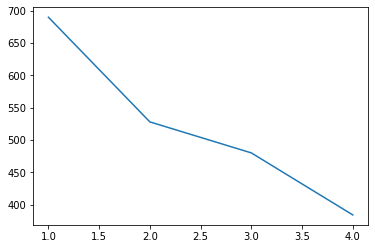

In [42]:
import numpy as np
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [43]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 480.0


In [44]:
fitClusters_cao

array([2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [45]:
x = x_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([x, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [46]:
combinedDf

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?,cluster_predicted
0,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service,2
1,Male,Unmarried,Frequently,Breach of payment details,Flipkart,Great discounts,1
2,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Great discounts,0
3,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
4,Female,Unmarried,Frequently,Breach of personal information,Amazon,Easy shopping,0
...,...,...,...,...,...,...,...
325,Female,Married,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service,0
326,Female,Unmarried,Frequently,Breach of payment details,Amazon,Easy shopping,0
327,Female,Unmarried,Frequently,Breach of payment details,Amazon,Great discounts,0
328,Female,Unmarried,Frequently,Breach of payment details,Flipkart,Great discounts,1


In [47]:
combinedDf.columns

Index(['Gender', 'Marital status', 'How often do you shop online ?',
       'What is your biggest concern about online shopping?',
       'Which online store you prefer the most among the following ?',
       'What do you like about online shopping ?', 'cluster_predicted'],
      dtype='object')

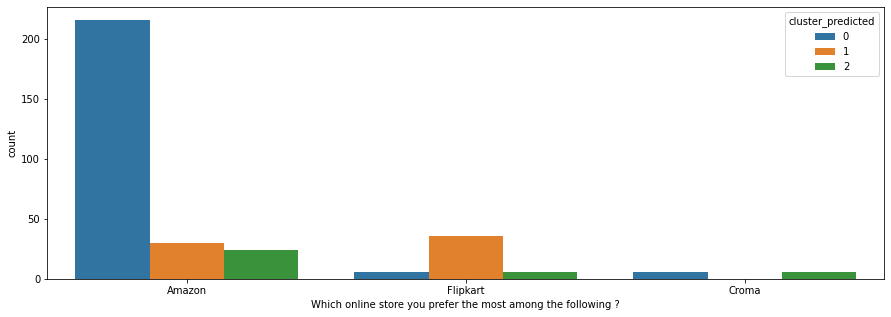

In [48]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Which online store you prefer the most among the following ?'],order=combinedDf['Which online store you prefer the most among the following ?'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

<AxesSubplot:xlabel='cluster_predicted', ylabel='Gender'>

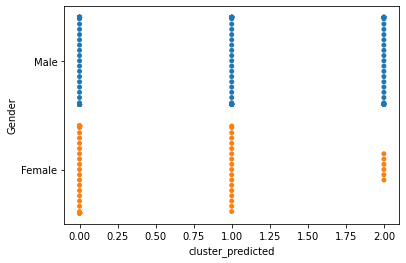

In [49]:
sns.swarmplot(combinedDf['cluster_predicted'],combinedDf['Gender'])

In [50]:
combinedDf[combinedDf['cluster_predicted']== 0].head(10)

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?,cluster_predicted
2,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Great discounts,0
3,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
4,Female,Unmarried,Frequently,Breach of personal information,Amazon,Easy shopping,0
6,Female,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
7,Female,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Great discounts,0
8,Female,Married,Never,Breach of payment details,Flipkart,Easy shopping,0
9,Female,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
10,Female,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
12,Female,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0
13,Male,Married,Frequently,Getting third quality product or a duplicate p...,Amazon,Easy shopping,0


In [51]:
combinedDf[combinedDf['cluster_predicted']== 1].head(10)

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?,cluster_predicted
1,Male,Unmarried,Frequently,Breach of payment details,Flipkart,Great discounts,1
22,Female,Unmarried,Rarely,Breach of payment details,Amazon,Great discounts,1
26,Male,Unmarried,Rarely,Breach of payment details,Flipkart,Easy shopping,1
30,Male,Married,Frequently,Breach of payment details,Amazon,Great discounts,1
32,Male,Married,Rarely,Breach of payment details,Amazon,Easy shopping,1
40,Female,Unmarried,Rarely,Getting third quality product or a duplicate p...,Flipkart,Great discounts,1
42,Male,Unmarried,Rarely,Breach of payment details,Flipkart,Great discounts,1
43,Male,Unmarried,Rarely,Breach of payment details,Flipkart,Great discounts,1
48,Male,Married,Never,Breach of personal information,Amazon,Great discounts,1
49,Male,Married,Rarely,Breach of personal information,Amazon,Great discounts,1


In [52]:
combinedDf[combinedDf['cluster_predicted']== 2].head(10)

,Gender,Marital status,How often do you shop online ?,What is your biggest concern about online shopping?,Which online store you prefer the most among the following ?,What do you like about online shopping ?,cluster_predicted
0,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service,2
5,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Customer service,2
11,Female,Unmarried,Rarely,Getting third quality product or a duplicate p...,Croma,Customer service,2
14,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Great discounts,2
44,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Easy shopping,2
46,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Flipkart,Customer service,2
55,Male,Unmarried,Frequently,Getting third quality product or a duplicate p...,Amazon,Customer service,2
60,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Customer service,2
66,Female,Unmarried,Rarely,Getting third quality product or a duplicate p...,Croma,Customer service,2
69,Male,Unmarried,Rarely,Getting third quality product or a duplicate p...,Amazon,Great discounts,2
